In [42]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data

In [43]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Web_Traffic,Have_At,SubDomain,Prefix/Suffix,Have_IP,URL_Depth,Redirection,TinyURL,Digit_count,Domain_Age,Label
0,en.turkeyforfriends.com,0,0,0,0,0,2,0,0,6,0,0
1,blogs.indiewire.com,0,0,0,0,0,3,0,0,0,0,0
2,absoluteastronomy.com,0,0,0,0,0,2,0,0,0,0,0
3,flickr.com,0,0,0,0,0,3,0,0,10,0,0
4,olx.co.id,0,0,0,0,0,2,0,1,5,0,0


In [44]:
data0.shape

(20000, 12)

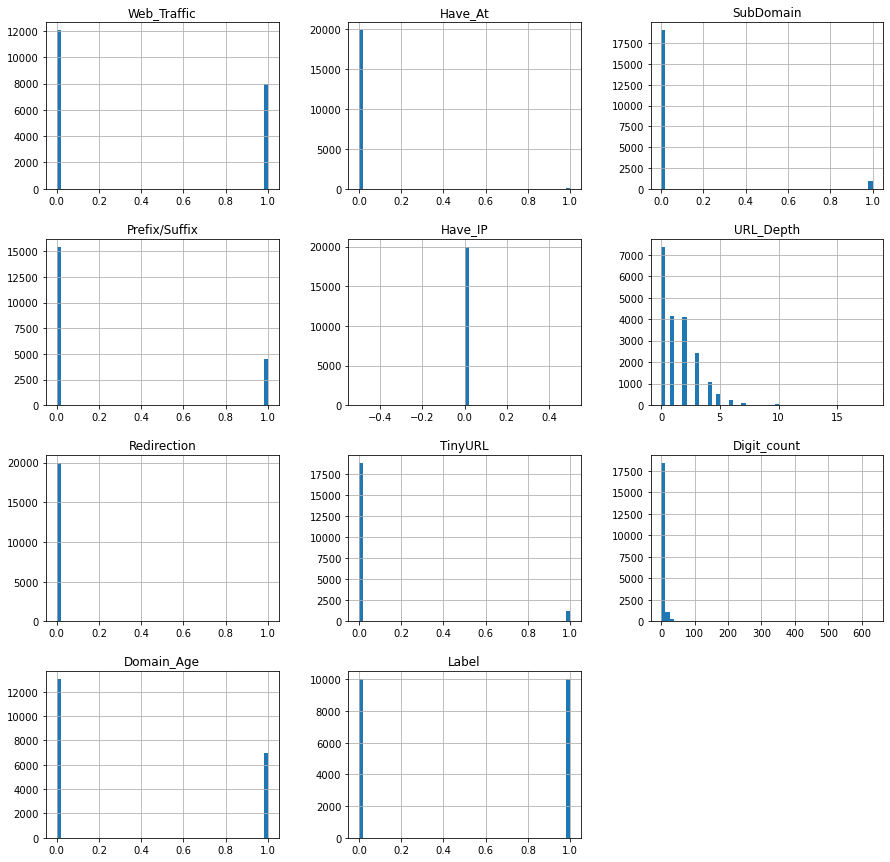

In [45]:
#Plotting the data distribution
data0.hist(bins=50, figsize=(15, 15))
plt.show()


Data Preprocessing and cleaning 

In [46]:
data0.describe()

,Web_Traffic,Have_At,SubDomain,Prefix/Suffix,Have_IP,URL_Depth,Redirection,TinyURL,Digit_count,Domain_Age,Label
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.398000,0.007400,0.048550,0.226900,0.0,1.458600,0.001950,0.059500,4.369500,0.348550,0.500000
std,0.489498,0.085707,0.214931,0.418838,0.0,1.578864,0.044117,0.236564,11.091791,0.476523,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.500000
75%,1.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,18.000000,1.000000,1.000000,632.000000,1.000000,1.000000


In [47]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis=1).copy()

In [48]:
#checking the data for null or missing values
data.isnull().sum()

Web_Traffic      0
Have_At          0
SubDomain        0
Prefix/Suffix    0
Have_IP          0
URL_Depth        0
Redirection      0
TinyURL          0
Digit_count      0
Domain_Age       0
Label            0
dtype: int64

In [49]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Web_Traffic,Have_At,SubDomain,Prefix/Suffix,Have_IP,URL_Depth,Redirection,TinyURL,Digit_count,Domain_Age,Label
0,1,0,0,1,0,0,0,0,5,1,1
1,1,0,0,0,0,0,0,0,7,0,1
2,1,0,0,0,0,2,0,0,5,1,0
3,0,0,0,0,0,3,0,0,0,1,0
4,0,0,0,0,0,3,0,0,5,1,0


Spliting the data into training and testing dataset

In [50]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label', axis=1)
X.shape, y.shape

((20000, 10), (20000,))

In [51]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=12)
X_train.shape, X_test.shape


((16000, 10), (4000, 10))

Machine learning models & training 

In [52]:
#importing packages
from sklearn.metrics import accuracy_score


1. Decision Tree Classifier

In [53]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

In [54]:
# instantiate the model
tree = DecisionTreeClassifier()
tree.fit(X_train.values,y_train)

DecisionTreeClassifier()

In [55]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)


d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [56]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(
    acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))


Decision Tree: Accuracy on training Data: 0.880
Decision Tree: Accuracy on test Data: 0.870


2. Random Forest

In [57]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier()

# fit the model 
forest.fit(X_train.values, y_train)

RandomForestClassifier()

In [58]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)


d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [59]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train, y_train_forest)
acc_test_forest = accuracy_score(y_test, y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(
    acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.880
Random forest: Accuracy on test Data: 0.872


3. Multilayer Perceptron(MLPs)

In [60]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100, 100, 100]))

# fit the model
mlp.fit(X_train.values, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [61]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [62]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train, y_train_mlp)
acc_test_mlp = accuracy_score(y_test, y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(
    acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(
    acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.873
Multilayer Perceptrons: Accuracy on test Data: 0.873


4. Support Vector Machine

In [70]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train.values, y_train)

SVC(kernel='linear', random_state=12)

In [71]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)


d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [72]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train, y_train_svm)
acc_test_svm = accuracy_score(y_test, y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))


SVM: Accuracy on training Data: 0.820
SVM : Accuracy on test Data: 0.831


5. Naive Bayes

In [73]:
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()
nb.fit(X_train.values,y_train)

MultinomialNB()

In [74]:
#predicting the target value from the model for the samples
y_test_nb = nb.predict(X_test)
y_train_nb = nb.predict(X_train)


d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [75]:
#computing the accuracy of the model performance
acc_train_nb = accuracy_score(y_train, y_train_nb)
acc_test_nb = accuracy_score(y_test, y_test_nb)

print("NB: Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("NB : Accuracy on test Data: {:.3f}".format(acc_test_nb))


NB: Accuracy on training Data: 0.827
NB : Accuracy on test Data: 0.838


6. AdaBoost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

aB = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

aB.fit(X_train.values, y_train)

AdaBoostClassifier(learning_rate=1)

In [77]:
#predicting the target value from the model for the samples
y_test_aB = aB.predict(X_test)
y_train_aB = aB.predict(X_train)


d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [78]:
#computing the accuracy of the model performance
acc_train_aB = accuracy_score(y_train, y_train_aB)
acc_test_aB = accuracy_score(y_test, y_test_aB)

print("NB: Accuracy on training Data: {:.3f}".format(acc_train_aB))
print("NB : Accuracy on test Data: {:.3f}".format(acc_test_aB))


NB: Accuracy on training Data: 0.840
NB : Accuracy on test Data: 0.848


Stacking Models - Bagging

In [79]:
from sklearn.ensemble import StackingClassifier

estimators = [('tree', tree), ('rf', forest), ('mlp', mlp), ('svm', svm), ('nb',nb), ('aB',aB)]

final_estimator = svm

classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

classifier.fit(X_train.values, y_train)


d:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


StackingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('mlp',
                                MLPClassifier(alpha=0.001,
                                              hidden_layer_sizes=[100, 100,
                                                                  100])),
                               ('svm', SVC(kernel='linear', random_state=12)),
                               ('nb', MultinomialNB()),
                               ('aB', AdaBoostClassifier(learning_rate=1))],
                   final_estimator=SVC(kernel='linear', random_state=12))

In [80]:
y_test_classifier = classifier.predict(X_test)
y_train_classifier = classifier.predict(X_train)

d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has

In [81]:
acc_classifier_train = accuracy_score(y_train, y_train_classifier)
acc_classifier_test = accuracy_score(y_test, y_test_classifier)
print("Accuracy on test Data: ", acc_classifier_test)
print("Accuracy on training Data:", acc_classifier_train)


Accuracy on test Data:  0.8745
Accuracy on training Data: 0.873625


Saving the model as a pickle file

In [82]:
import pickle
pickle.dump(classifier, open('phishing_model.pkl', 'wb'))
